In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import plotly.graph_objs as go

In [24]:
def intensity(kinetic_energy, max_energy, Z):
    me = 0.511*1000 #keV
    return np.sqrt(kinetic_energy**2+2*kinetic_energy*me)*(max_energy - kinetic_energy)**2*(kinetic_energy + me)*Fermi_function(Z, kinetic_energy)

def Fermi_function(Z, kinetic_energy):
    me = 0.511*1000 #keV
    a = 1/137
    E = kinetic_energy + me
    pc = np.sqrt(E**2 - me**2)
    x = Z*a*E/pc
    return 2*np.pi*x/(1-np.exp(-2*np.pi*x))

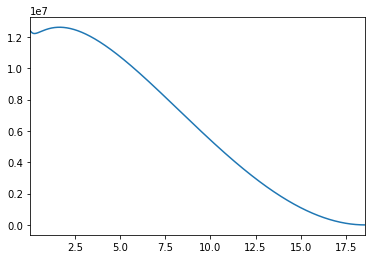

In [30]:
max_energy = 18.57
n = 1000
dist = np.zeros(n)
KEs = np.linspace(0.001, max_energy, n)
dist = intensity(KEs, max_energy, 3)
plt.xlim(0.001, max_energy)
plt.plot(KEs, dist)

In [27]:
dist

array([1.23879969e+07, 1.23641098e+07, 1.23403997e+07, 1.23175996e+07,
       1.22966415e+07, 1.22781490e+07, 1.22623920e+07, 1.22493940e+07,
       1.22390353e+07, 1.22311236e+07, 1.22254367e+07, 1.22217470e+07,
       1.22198348e+07, 1.22194950e+07, 1.22205398e+07, 1.22227995e+07,
       1.22261214e+07, 1.22303695e+07, 1.22354224e+07, 1.22411719e+07,
       1.22475222e+07, 1.22543878e+07, 1.22616929e+07, 1.22693698e+07,
       1.22773584e+07, 1.22856050e+07, 1.22940619e+07, 1.23026862e+07,
       1.23114397e+07, 1.23202884e+07, 1.23292015e+07, 1.23381518e+07,
       1.23471145e+07, 1.23560676e+07, 1.23649914e+07, 1.23738681e+07,
       1.23826816e+07, 1.23914177e+07, 1.24000635e+07, 1.24086073e+07,
       1.24170389e+07, 1.24253488e+07, 1.24335287e+07, 1.24415711e+07,
       1.24494693e+07, 1.24572172e+07, 1.24648096e+07, 1.24722417e+07,
       1.24795091e+07, 1.24866082e+07, 1.24935356e+07, 1.25002884e+07,
       1.25068641e+07, 1.25132603e+07, 1.25194753e+07, 1.25255074e+07,
      

In [35]:
def T(E, left, right):
    if left < E < right:
        return 1500 / (right - left)
    else:
        return 10e-19

In [32]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2


def T(x, x_knots, b):
    t = x_knots
    T = 1e-19
    for i in range(2, len(t)-6):
        T += b[i]*B(x, 3, i, t)
    return T

In [26]:
KEs = np.linspace(0.001, max_energy, n)
dist_rnd = np.zeros(len(KEs))
dist = intensity(KEs, max_energy, 3)
a = 0
b = max_energy
x_knots = np.concatenate([np.linspace(a-2, a-0.5, 3), np.linspace(a, b, 22), np.linspace(b + 1.5, b + 3.5, 3)])
b = [0, 0, 0, 0, 0, 0, 0] + [1]*(len(x_knots)-10) + [0, 0, 0]

for i in range(len(KEs)):
    dist_rnd[i] = dist[i] + np.mean(dist)*random.gauss(1.0,1/np.sqrt(10000*T(KEs[i], x_knots, b)))


KEs = KEs[(dist_rnd < 2.5*1e7)&(dist_rnd > 0.001)]
dist_rnd = dist_rnd[(dist_rnd < 2.5*1e7)&(dist_rnd > 0.001)]/10**7
#plt.plot(KEs, dist_rnd, '.')

popt, pcov = curve_fit(f = experimental, xdata= KEs, ydata=dist_rnd,
                      p0 = [18.57,  6.16943522e-01, 3.07925755e-09], method='lm')
experimental(KEs, *popt)
traces = [go.Scatter(x = KEs, y = dist_rnd, name = "experimental"),
         go.Scatter(x = KEs, y = experimental(KEs, *popt), name = "fit")]
go.Figure(traces)

In [27]:
popt

array([1.88271380e+01, 6.25541363e-01, 9.59653674e-08])

In [25]:
KEs = np.linspace(0.001, max_energy, n)
dist = intensity(KEs, max_energy, 3)

dist_rnd = np.zeros(len(dist))
for i in range(len(dist)):
    dist_rnd[i] = dist[i] + random.gauss(1.0, 1/np.sqrt(10000*T(KEs[i], 0, 15)))

plt.plot(KEs[np.logical_and(KEs>0, KEs<15)], dist_rnd[np.logical_and(KEs>0, KEs<15)], '.')
#for i in range(len(dist)):
#    dist_rnd[i] = random.gauss(intensity(KEs[i], max_energy, 3)*T(KEs[i], 0.1, 17),1/np.sqrt(intensity(KEs[i], max_energy, 3)*T(KEs[i], 0.1, 17)))
#dist_rnd = dist + np.mean(dist)*dist_rnd/np.mean(dist_rnd[dist_rnd<3*10**9])
#plt.plot(KEs[np.logical_and(KEs>0.1, KEs<17)], dist_rnd[np.logical_and(KEs>0.1, KEs<17)], '.')

TypeError: object of type 'int' has no len()

In [6]:
def experimental(kinetic_energy, max_energy, noise, calibr, Z=3, me=511):
    return calibr*np.sqrt(kinetic_energy**2+2*kinetic_energy*me)*(max_energy - kinetic_energy)**2*(kinetic_energy + me)*Fermi_function(Z, kinetic_energy) + noise 



[-1.22655191e+04  2.44418126e+04 -9.25491315e-09 -5.85716325e+08]
[[ 2.07787336e+17 -7.78530007e+18 -3.34472768e+05 -5.75075489e+22]
 [-7.78530007e+18  2.95824119e+20  1.25326751e+07  2.19041814e+24]
 [-3.34472768e+05  1.25326751e+07  5.38396925e-07  9.25758894e+10]
 [-5.75075489e+22  2.19041814e+24  9.25758893e+10  1.62254729e+28]] 127396903760863.67


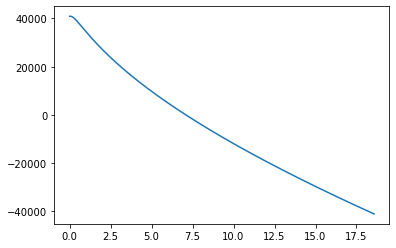

In [28]:
n = 1000
KEs = np.linspace(0.001, max_energy, n)
dist = intensity_lin(KEs, max_energy, 2*10**4)
dist_rnd = np.zeros(n)
for i in range(n):
    dist_rnd[i] = dist[i] + np.mean(dist)*random.gauss(1.0,1/np.sqrt(50000*T(KEs[i], x_knots, b))) - np.mean(dist)


y = dist_rnd/10**7
popt, pcov = curve_fit(f = experimental_lin, xdata= KEs, ydata=y,
                      p0 = [18.57,  6.16943522e-01, 1.07925755e-07, 2*10**4], method='lm')

plt.plot(KEs, experimental_lin(KEs, *popt))

print(popt)
print(pcov, np.sqrt(np.diagonal(pcov)).sum())



In [7]:
def experimental_lin(kinetic_energy, max_energy, noise, calibr, lin, Z=3, me=511):
    return calibr*(np.sqrt(kinetic_energy**2+2*kinetic_energy*me)*(max_energy - kinetic_energy)**2*(kinetic_energy + me)*Fermi_function(Z, kinetic_energy) -lin*(max_energy - kinetic_energy)) + noise 

def intensity_lin(kinetic_energy, max_energy, ampl, Z=3, me=511):
    return np.sqrt(kinetic_energy**2+2*kinetic_energy*me)*(max_energy - kinetic_energy)**2*(kinetic_energy + me)*Fermi_function(Z, kinetic_energy)-ampl*(max_energy - kinetic_energy)

In [24]:
max_energy = 18.57
n = 1000
KEs = np.linspace(0.001, max_energy, n)
#dist = np.zeros(n)
dist = intensity_lin(KEs, max_energy, 2*10**4)
m = 1000
cov = np.zeros(m)
cov2 = np.zeros(m)
dist_rnd = np.zeros(n)
widths = np.linspace(13, 17, 20)
#start = np.linspace(0.001, max_energy-width, m)
#end = np.linspace(15, 18.6, m)
sigmas = np.zeros(20)

for k, w in enumerate(widths):
    width = w
    start = np.linspace(0.001, max_energy-width, m)
    for j in range(m):
        left = start[j]
        right = left + width
        for i in range(n):
            dist_rnd[i] = dist[i] + np.mean(dist)*random.gauss(1.0,1/np.sqrt(10*T(KEs[i], left, right)))-np.mean(dist)

        dist_rnd = dist_rnd[np.logical_and(KEs>left, KEs<right)]
        KEs = KEs[np.logical_and(KEs>left, KEs<right)]
        y = dist_rnd/10**7
        popt, pcov = curve_fit(f = experimental_lin, xdata= KEs, ydata=y,
                      p0 = [18.57,  6.16943522e-01, 1.07925755e-07, 2*10**4], method='dogbox')
        #plt.plot(KEs, y, '.')
        #plt.plot(KEs, experimental_lin(KEs, *popt))
        #plt.show()
        cov[j] = pcov[0][0]
        cov2[j] = pcov[3][3]
        dist_rnd = np.zeros(n)
        KEs = np.linspace(0.001, max_energy, n)

    cov_sqrt = np.sqrt(cov)
    sigmas[k] = np.min(cov_sqrt)
    plt.plot(start+width, cov_sqrt, '.', label='width = ' +str(width))
    plt.xlabel('end')
    plt.ylabel('sigma of max energy')
    plt.legend()
    #plt.savefig('sigma_enrgy_end_params_2_width_' +str(width) +'_dogbox.png', dpi=150)
    plt.show()
    

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

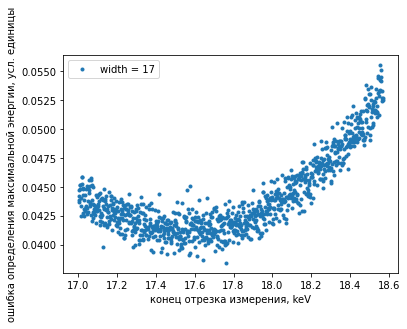

In [40]:
max_energy = 18.57
n = 1000
KEs = np.linspace(0.001, max_energy, n)
#dist = np.zeros(n)
dist = intensity_lin(KEs, max_energy, 2*10**4)
m = 1000
cov = np.zeros(m)
cov2 = np.zeros(m)
dist_rnd = np.zeros(n)
#widths = np.linspace(13, 17, 20)
#start = np.linspace(0.001, max_energy-width, m)
#end = np.linspace(15, 18.6, m)
sigmas = np.zeros(20)


width = 17
start = np.linspace(0.001, max_energy-width, m)
for j in range(m):
    left = start[j]
    right = left + width
    for i in range(n):
        dist_rnd[i] = dist[i] + np.mean(dist)*random.gauss(1.0,1/np.sqrt(10*T(KEs[i], left, right)))-np.mean(dist)

    dist_rnd = dist_rnd[np.logical_and(KEs>left, KEs<right)]
    KEs = KEs[np.logical_and(KEs>left, KEs<right)]
    y = dist_rnd
    popt, pcov = curve_fit(f = experimental_lin, xdata= KEs, ydata=y,
                  p0 = [18.57,  0, 1, 2*10**4],bounds=((18, -0.5, 0.5, 1.5*10**4), (19, 0.5, 1.5, 2.5*10**4)), method='dogbox')
    #plt.plot(KEs, y, '.')
    #plt.plot(KEs, experimental_lin(KEs, *popt))
    #plt.show()
    cov[j] = pcov[0][0]
    cov2[j] = pcov[3][3]
    dist_rnd = np.zeros(n)
    KEs = np.linspace(0.001, max_energy, n)

cov_sqrt = np.sqrt(cov)

plt.plot(start+width, cov_sqrt, '.', label='width = ' +str(width))
plt.xlabel('конец отрезка измерения, keV')
plt.ylabel('ошибка определения максимальной энергии, усл. единицы')
plt.legend()
#plt.savefig('sigma_enrgy_end_params_2_width_' +str(width) +'_thesis.png', dpi=150)
plt.show()


Text(0, 0.5, 'min sigma')

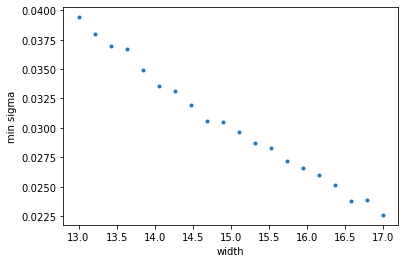

In [17]:
plt.plot(widths, sigmas, '.')
plt.xlabel('width')
plt.ylabel('min sigma')
#plt.legend()
#plt.savefig('sigma_width_params_2.png', dpi=150)

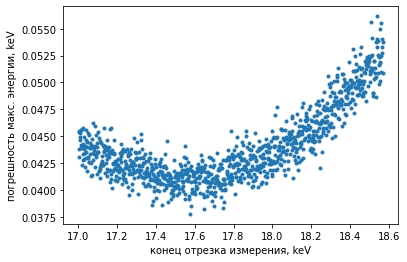

In [18]:
cov_sqrt = np.sqrt(cov)
#popt, pcov = curve_fit(f = cub, xdata= start+width, ydata=cov_sqrt)
plt.plot(start+width, cov_sqrt, '.')
#plt.plot(start+width, cub(start+width, *popt), label='cube')
plt.xlabel('конец отрезка измерения, keV')
plt.ylabel('погрешность макс. энергии, keV')
#plt.legend()
#plt.savefig('sigma_enrgy_end_params_2_width_' +str(width) +'_thesis.png', dpi=150)

In [22]:
max_energy = 18.57
n = 1000
KEs = np.linspace(0.001, max_energy, n)
dist = np.zeros(n)
dist = intensity(KEs, max_energy, 3)
rnd_error = np.zeros(n)
for i in range(n):
    rnd_error[i] = np.mean(dist)*random.gauss(1.0, 0.1) 

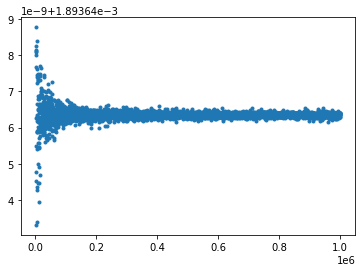

In [27]:
m = 5000
cov = np.zeros(m)
lin = np.linspace(10**3, 10**6, m)
for j in range(m):    
    dist = intensity_lin(KEs, max_energy, lin[j]) + rnd_error
    y = dist/10**7
    popt, pcov = curve_fit(f = experimental_lin, xdata= KEs, ydata=y,
                      p0 = [10e3,  6.16943522e-01, 1.07925755e-07], method='lm')
    
    cov[j] = pcov[1][1]
    #print(pcov, np.sqrt(np.diagonal(pcov)).sum())

plt.plot(lin, cov, '.')   

In [81]:
print(popt)
print(pcov)

[1.85361592e+01 6.37833925e-01 1.00180606e-07 1.00000000e-05]
[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


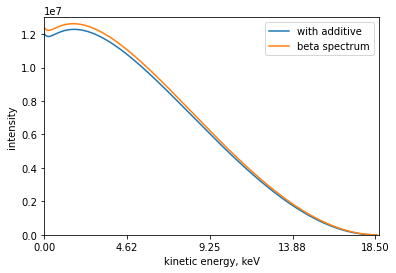

In [132]:
max_energy = 18.57
n = 1000
dist = np.zeros(n)
KEs = np.linspace(0.001, max_energy, n)
dist = intensity_lin(KEs, max_energy, 2*10**4)
dist0 = intensity(KEs, max_energy, 3)
plt.plot(KEs, dist, label='with additive')
plt.plot(KEs, dist0, label='beta spectrum')
plt.xlabel('kinetic energy, keV')
plt.ylabel('intensity')
plt.xticks(np.linspace(0, 18.5, 5))
plt.ylim([0, 1.3*10**7])
plt.xlim([0, 18.7])
plt.legend()
#plt.savefig('beta_spectrum_delta.png', dpi=150)